# Análisis  de Datos

## 1.Descripción de archivo base

Los datos comprenden base de datos con las siguientes columnas, generadas por medio de Google Analytics


**1.brandingInterest:** Esta variable muestra  el tipo  de interés que tuvieron los usuarios que se encuentran en etapas avanzadas del proceso de compra. Los usuarios se registran en diferentes categorías según sus intereses. Por ejemplo, “Estilos de vida y hobbies/Amantes de los animales” o “Viajeros/Fans de los viajes/Viajeros de playa”.

**2.userAgeBracket:** Esta variable se utiliza para agrupar a los usuarios en categorías o brackets de edad. Los brackets de edad son rangos específicos que abarcan un conjunto de edades similares. Por ejemplo, los brackets podrían ser "Menores de 18 años", "De 18 a 25 años", "De 26 a 35 años" y así sucesivamente. Esta variable ayuda a comprender la distribución de edades de los usuarios en el conjunto de datos.

**3.userGender:** Esta variable indica el género o sexo de los usuarios. Puede tomar valores como "Masculino", "Femenino", "No binario" u otras categorías que representen la identidad de género de los usuarios. El propósito de esta variable es analizar la composición de género de la audiencia o realizar análisis específicos relacionados con el género.

**4.country:** Esta variable indica el país de origen o ubicación geográfica de los usuarios. Cada valor corresponde a un país específico, como "Estados Unidos", "Canadá", "Reino Unido", etc. El país de origen es útil para realizar análisis geográficos, como la segmentación de usuarios por ubicación geográfica.

**5.region:** Muestra la zona geográfica de donde viene el usuario, basándose en su IP.

**6.sessions:** Muestra el número de sesiones que superaron los 10 segundos, lograron una conversión o tuvieron 2 o más visitas.

Información basada en el sitio de Google Analytics Data API Google Developers (Developers, 2023) donde describen la generación de los datos generados desde Google Analytics.


## Cargue base de datos

In [21]:
## librerias utilizadas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
## Cargar archivo
df = pd.read_csv("Base consolidada oficial.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brandingInterest  5870 non-null   object
 1   userAgeBracket    5870 non-null   object
 2   userGender        5870 non-null   object
 3   country           5870 non-null   object
 4   region            5870 non-null   object
 5   sessions          5870 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 275.3+ KB


In [23]:
df.head(2)

,brandingInterest,userAgeBracket,userGender,country,region,sessions
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106


La columna 'brandingInterest' tiene de forma concatenada y separa con '/' los intereses de las peronas por lo tanto se realiza una transformación de los datos para poder separarlos y mejorar el análisis según los intereses únicos.

## Transformación base de datos

In [24]:
#Copia de la base de datos original
df_transformada = df.copy()
#Separar por columnas los intereses
df_transformada[['int1', 'int2', 'int3', 'int4']] = df_transformada['brandingInterest'].str.split('/', n=3, expand=True)
#Contar el nùmero de intereses totales para dividir equitativamente las sesiones
df_transformada['N_intreses'] = 4-df_transformada.isna().sum(axis=1)
df_transformada['sessions'] = df_transformada['sessions']/df_transformada['N_intreses']

In [25]:
## Ver las primeras dos filas de la base de datos
df.head(1)

,brandingInterest,userAgeBracket,userGender,country,region,sessions
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107


## Análisis base de datos

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5870 entries, 0 to 5869
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   brandingInterest  5870 non-null   object
 1   userAgeBracket    5870 non-null   object
 2   userGender        5870 non-null   object
 3   country           5870 non-null   object
 4   region            5870 non-null   object
 5   sessions          5870 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 275.3+ KB


Pasamos de 5870 registros a  14316  registros de la base de datos y no hay ningùn registro de datos vacio.

In [27]:
df.nunique()

brandingInterest    102
userAgeBracket        7
userGender            3
country               1
region               20
sessions            229
dtype: int64

La variable brandingInterest tiene 116 valores unicos, hay 7 grupos etareos comprendidos en la variable userAgeBracket, 3 generos diferenciados en userGender, todos los datos comprenden solo un paìs y 20 regiones. 

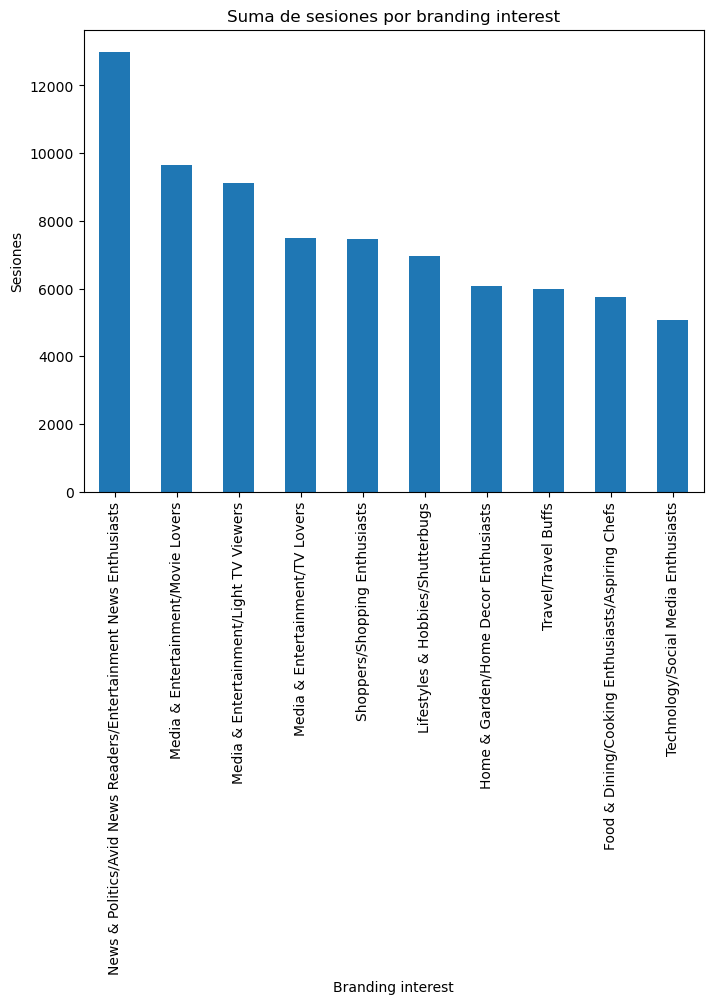

In [28]:
# Agrupar y sumar sesiones por branding interest
df_grouped = df.groupby('brandingInterest')['sessions'].sum()
# Ordenar y seleccionar los primeros 10 valores
df_top10 = df_grouped.sort_values(ascending=False).head(10)
# Crear la gráfica de barras
df_top10.plot.bar(title='Suma de sesiones por branding interest', xlabel='Branding interest', ylabel='Sesiones', figsize=(8,6))
plt.show()

In [29]:
# Calcular el porcentaje del total
df_top10_pct = df_top10.apply(lambda x: x / df_grouped.sum() * 100).round(2)

# Mostrar el resultado
df_top10_pct.sum()

37.050000000000004

In [30]:
df

,brandingInterest,userAgeBracket,userGender,country,region,sessions
0,News & Politics/Avid News Readers/Entertainmen...,25-34,female,United States,California,107
1,News & Politics/Avid News Readers/Entertainmen...,35-44,female,United States,California,106
2,Media & Entertainment/Light TV Viewers,35-44,female,United States,California,99
3,Media & Entertainment/Movie Lovers,35-44,female,United States,California,95
4,Media & Entertainment/TV Lovers,35-44,female,United States,California,95
...,...,...,...,...,...,...
5865,Travel/Travel Buffs/Family Vacationers,45-54,male,United States,New York,10
5866,Travel/Travel Buffs/Luxury Travelers,65+,male,United States,California,10
5867,Vehicles & Transportation/Auto Enthusiasts/Per...,35-44,male,United States,California,10
5868,Vehicles & Transportation/Auto Enthusiasts/Tru...,55-64,female,United States,Florida,10


En la variable brandingInterest se puede observar que "Media & Entertrainment" es el interes más alto, seguido por "Lifestyles & Hobbies". El top 10 comprende el 47% del total de las sesiones.

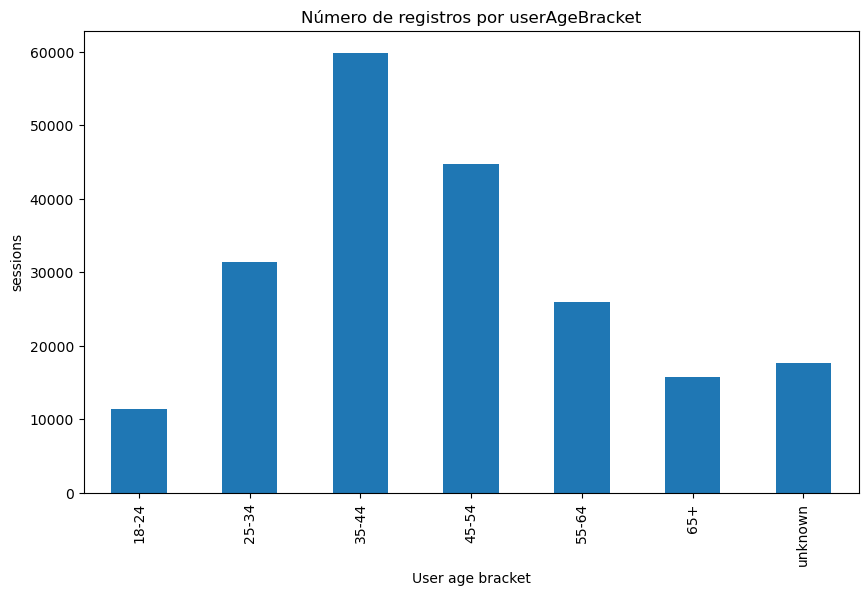

In [31]:
# Agrupar y contar registros por userAgeBracket
df_age = df.groupby('userAgeBracket')['sessions'].sum()

# Crear la gráfica de columnas
df_age.plot.bar(title='Número de registros por userAgeBracket', xlabel='User age bracket', ylabel='sessions', figsize=(10,6))
plt.show()

In [32]:
df_age['35-44']/df_age.sum()

0.289807591800391

Las sesiones que mayor tiene numero de sesiones es de 35 a 44 años, que comprende un total 59887 de sesiones que comprende un 28.98% de los datos 

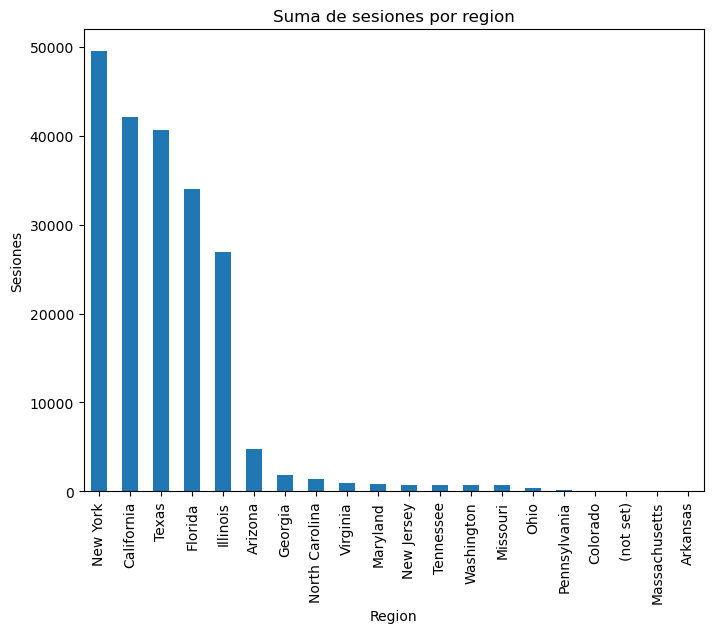

In [33]:
# Agrupar y sumar sesiones por branding interest
df_grouped = df.groupby('region')['sessions'].sum()
df_order = df_grouped.sort_values(ascending=False).head(20)
# Crear la gráfica de barras
df_order.plot.bar(title='Suma de sesiones por region', xlabel='Region', ylabel='Sesiones', figsize=(8,6))
plt.show()

In [34]:
df_order.head(5)

region
New York      49502
California    42146
Texas         40695
Florida       34002
Illinois      26932
Name: sessions, dtype: int64

In [35]:
import plotly.graph_objects as go

In [36]:
df_regiones = pd.read_excel("Regiones.xlsx")

In [37]:
df_combinado = pd.merge(df, df_regiones, on='region')

In [38]:
df_combinado.to_csv("df_coordenadas2.csv")

In [39]:
df_2 = df_combinado[['region','sessions','Lon','Lat']]
df_map = df_2.groupby(by =['region','Lon','Lat']).sum()
df_map = df_map.reset_index()
df_map.head(20)

,region,Lon,Lat,sessions
0,Arizona,33.729759,-111.431221,4798
1,Arkansas,34.969704,-92.373123,10
2,California,36.116203,-119.681564,42146
3,Colorado,39.059811,-105.311104,81
4,Florida,27.766279,-81.686783,34002
5,Georgia,33.040619,-83.643074,1842
6,Illinois,40.349457,-88.986137,26932
7,Maryland,39.063946,-76.802101,869
8,Massachusetts,42.230171,-71.530106,10
9,New Jersey,40.298904,-74.521011,746


### Relación entre variables

### Relación del genero y el grupo etario

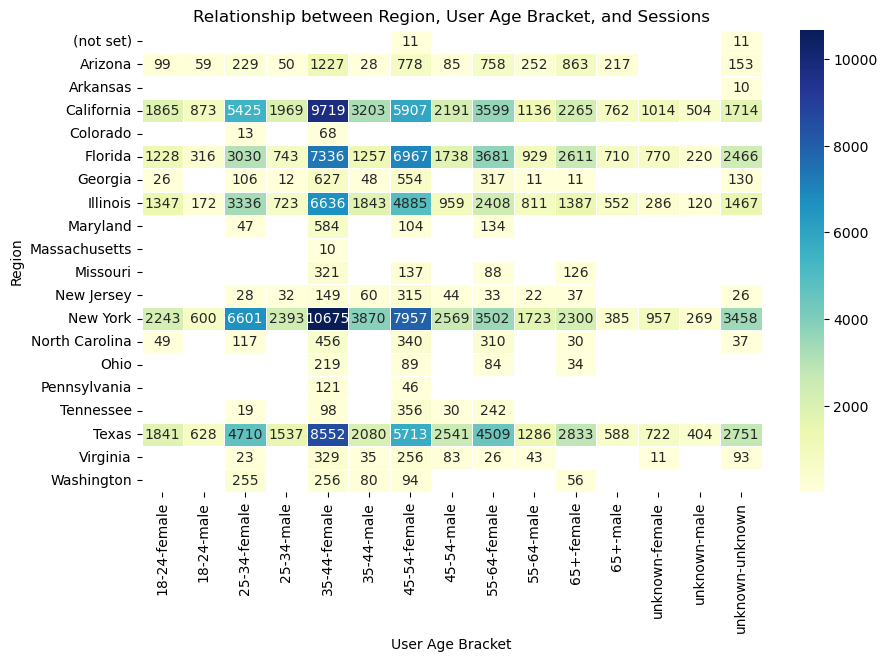

In [40]:
heatmap_data = df.pivot_table(index='region', columns=['userAgeBracket', 'userGender'], values='sessions', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Relationship between Region, User Age Bracket, and Sessions')
plt.xlabel('User Age Bracket')
plt.ylabel('Region')

plt.show()

El mayor número de sesiones se encuentra el grupo etario de mujeres de 35-44 años en New York

### Relación del genero y el grupo etario

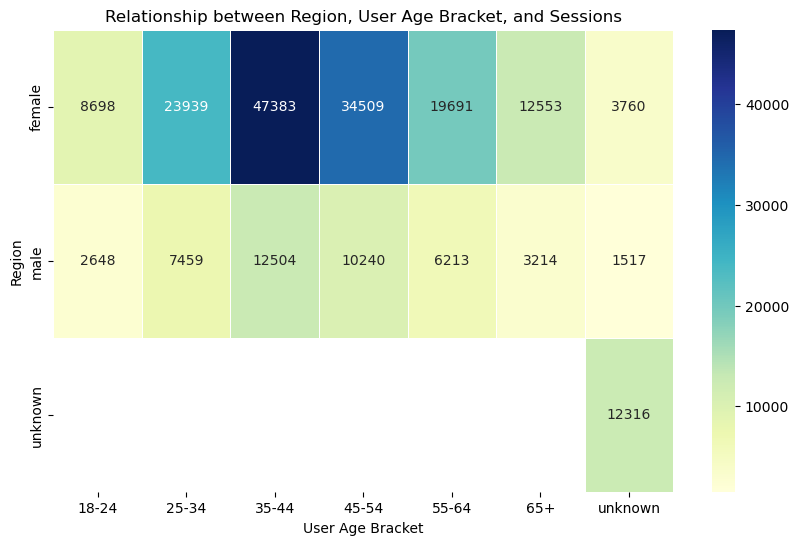

In [41]:
heatmap_data = df.pivot_table(index='userGender', columns='userAgeBracket', values='sessions', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Relationship between Region, User Age Bracket, and Sessions')
plt.xlabel('User Age Bracket')
plt.ylabel('Region')

plt.show()

### Relación del genero y la region

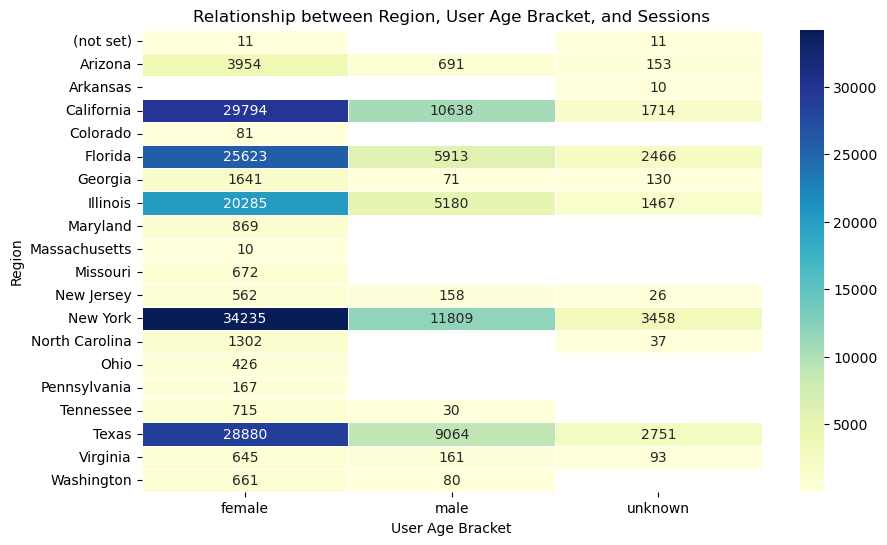

In [42]:
heatmap_data = df.pivot_table(index='region', columns='userGender', values='sessions', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Relationship between Region, User Age Bracket, and Sessions')
plt.xlabel('User Age Bracket')
plt.ylabel('Region')

plt.show()

### Relación de la localización y el volumen de sesiones

In [45]:
import folium

latitude_us = 39.8283  # Latitud de referencia 
longitude_us = -98.5795  # Longitud de referencia 
zoom_level = 4.3  # Nivel de zoom inicial

# Crea un objeto de mapa centrado en Estados Unidos
m = folium.Map(location=[latitude_us, longitude_us], zoom_start=zoom_level)

for index, row in df_map.iterrows():
    # Extrae la longitud, latitud y valor 'f' de cada fila
    lon = row['Lat']
    lat = row['Lon']
    sessions = row['sessions']
    
    # Crea una burbuja en el mapa con el valor 'f' como tamaño
    folium.Circle(
        location=[lat, lon],
        radius= sessions*10  ,  # Ajusta el tamaño de la burbuja multiplicando por un factor
        color='blue',   # Color de la burbuja
        fill=True,
        fill_color='green',  # Color de relleno de la burbuja
        fill_opacity=0.4,
        popup=f'Valor f: {sessions}'  # Etiqueta emergente que muestra el valor 'f'
    ).add_to(m)

# Muestra el mapa en el Jupyter Notebook
m